Importing Liberaries for Analysis


In [64]:
import os
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns

In [65]:
df = pd.read_csv('car_evaluation.csv')

Exploratory Data Analysis

In [66]:
#shape of the dataframe
df.shape

(1727, 7)

In [67]:
#top 5 values of the dataframe
df.head

<bound method NDFrame.head of       vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]>

In [68]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names


In [69]:
df.head

<bound method NDFrame.head of      buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    med  unacc
1     vhigh  vhigh      2       2    small   high  unacc
2     vhigh  vhigh      2       2      med    low  unacc
3     vhigh  vhigh      2       2      med    med  unacc
4     vhigh  vhigh      2       2      med   high  unacc
...     ...    ...    ...     ...      ...    ...    ...
1722    low    low  5more    more      med    med   good
1723    low    low  5more    more      med   high  vgood
1724    low    low  5more    more      big    low  unacc
1725    low    low  5more    more      big    med   good
1726    low    low  5more    more      big   high  vgood

[1727 rows x 7 columns]>

In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [71]:
#frequency Distribution
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
      print(df[col].value_counts())  
        

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


Vector and target variable

In [72]:
X = df.drop(['class'], axis=1)

y = df['class']

Training and test set

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [74]:
X_train.shape, X_test.shape

((1036, 6), (691, 6))

In [75]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [76]:
X_train.head

<bound method NDFrame.head of      buying  maint  doors persons lug_boot safety
615    high   high      4    more      med    med
294   vhigh    med      4    more      big    med
711    high    med      4       4    small    med
1637    low    low      2    more    small    low
88    vhigh  vhigh  5more       2      big   high
...     ...    ...    ...     ...      ...    ...
1130    med    med      3    more      big    low
1294    med    low  5more    more      big   high
860    high    low  5more    more      big    low
1459    low   high      4       2    small   high
1126    med    med      3    more    small   high

[1036 rows x 6 columns]>

Encode Catagorical Variables


In [77]:
import category_encoders as ce


In [78]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [79]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
615,1,1,1,1,1,1
294,2,2,1,1,2,1
711,1,2,1,2,3,1
1637,3,3,2,1,3,2
88,2,4,3,3,2,3


RFC Model

In [80]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



In [81]:
#CHecking the model accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9378


parameter n_estimators=100 

In [82]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

In [83]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9378


In [84]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [85]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.278315
persons     0.230050
maint       0.176043
buying      0.152854
lug_boot    0.086758
doors       0.075979
dtype: float64

AttributeError: module 'matplotlib' has no attribute 'xlabel'

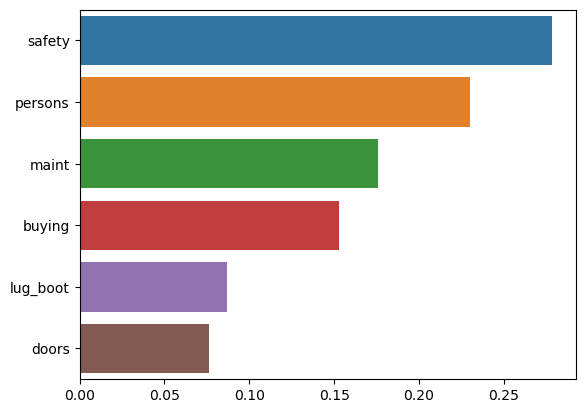

In [88]:
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

Multiple features

In [89]:
X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [91]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [92]:
clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9263


Confusion Matix

In [93]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


Classification Report

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570



1000 Descision Trees

In [95]:
rfc_1000 = RandomForestClassifier(n_estimators=1000, random_state=0)



# fit the model to the training set

rfc_1000.fit(X_train, y_train)



# Predict on the test set results

y_pred_1000 = rfc_1000.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_1000)))

Model accuracy score with 100 decision-trees : 0.9368
